# Ridge Regression and the Lasso

We will use the `glmnet` package in order to perform ridgee regression and the lasso. The main functionin this package is `glmnet()`, which can be used to fit ridge regression models, lasso models, and more. This function has slightly different syntax from the other model-fitting functions we've used so far. In particular, we must pass an `x` matrix as well as a `y` vector, and we do not use the `y ~ x` syntax. We will perform the ridge regression and the lasso in order to predict `Salary` on the `Hitters` data. Before proceeding, ensure tthat the missing values have been removed from the data.

In [2]:
library(ISLR)

# Remove any NA values from the data
Hitters <- na.omit(Hitters)

# Create x matrix and y vector
x <- model.matrix(Salary ~ ., Hitters)[,-1]
y <- Hitters$Salary

The `model.matrix()` function is particularly useful for creating `x`. It produces a matrix corresponding to the 19 predictors and also automatically transforms any qualitative variables into dummy variables, which is important because `glmnet()` can only take numerical, quantitative inputs.

In [3]:
x

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,0
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,1,0,76,127,7,0
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,0,1,121,283,9,0
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,1,1,143,290,19,1
-Andre Thornton,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0,0,0,0
-Alan Trammell,574,159,21,107,75,59,10,4631,1300,90,702,504,488,0,0,238,445,22,0


In [4]:
Hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.000,A
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.000,N
-Andre Thornton,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.000,A
-Alan Trammell,574,159,21,107,75,59,10,4631,1300,90,702,504,488,A,E,238,445,22,517.143,A


The `glmnet()` function has an `alpha` argument that determines what type of model is fit. If `alpha=0`, then a ridge regression model is fit. If `alpha=1`, then a lasso model is fit. We'll fit a ridge regression model first.

In [6]:
library(glmnet)
grid <- 10^seq(10, -2, length = 100)
ridge.mod <- glmnet(x, y, alpha = 0, lambda = grid)

By default the `glmnet()` function performs ridge regression for an automatically selected range of $\lambda$ values. However, here we have chosen to implement the function over a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$, esentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit. As we will see, we can also compute model fits for a particular value of $\lambda$ that is not one of the original `grid` values. Note that by default, the `glmnet()` function standardizes the variables so that they are on the same scale. To turn off this default setting, use the argument `standardize=FALSE`.  
  
  Associated with each value of $\lambda$ is a vector of ridge regression coefficients, stored in a matrix that can be accessed by `coef()`. In this case, it is a $20 \times 100$ matrix, with 20 rows (one for each predictor, plus an intercept) and 100 columns (one for each value of $\lambda$).

In [7]:
dim(coef(ridge.mod))

[1]  20 100

We expect the coefficient esttimates to be much smaller, in terms of L2 norm, when a large value of $\lambda$ is used, as compared to when a small value of $\lambda$ is used. These are the coefficients when $\lambda$ = 11,498, along with their L2 norm:

In [8]:
ridge.mod$lambda[50]

[1] 11497.57

In [9]:
coef(ridge.mod)[,50]

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

In [12]:
sqrt(sum(coef(ridge.mod)[-1,50]^2)) # calculate sqrt of the sum of the squared coefficients (not including intercept)
# This is the L2 norm

[1] 6.360612

In contrast, here are the coefficients when $\lambda = 705$, along with their L2 norm. Note the much larger L2 norm of the coefficients with this smaller value of $\lambda$.

In [13]:
ridge.mod$lambda[60]

[1] 705.4802

In [15]:
coef(ridge.mod)[,60]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 54.32519950   0.11211115   0.65622409   1.17980910   0.93769713   0.84718546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.31987948   2.59640425   0.01083413   0.04674557   0.33777318   0.09355528 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.09780402   0.07189612  13.68370191 -54.65877750   0.11852289   0.01606037 
      Errors   NewLeagueN 
 -0.70358655   8.61181213

In [16]:
sqrt(sum(coef(ridge.mod)[-1,60]^2)) # The L2 norm when lambda = 705

[1] 57.11001

We can use the `predict()` function for a number of purposes. For instance, we can obtain the ridge regression coefficients for a new value of $\lambda$, say 50:

In [17]:
predict(ridge.mod, s = 50, type = 'coefficients')

20 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  4.876610e+01
AtBat       -3.580999e-01
Hits         1.969359e+00
HmRun       -1.278248e+00
Runs         1.145892e+00
RBI          8.038292e-01
Walks        2.716186e+00
Years       -6.218319e+00
CAtBat       5.447837e-03
CHits        1.064895e-01
CHmRun       6.244860e-01
CRuns        2.214985e-01
CRBI         2.186914e-01
CWalks      -1.500245e-01
LeagueN      4.592589e+01
DivisionW   -1.182011e+02
PutOuts      2.502322e-01
Assists      1.215665e-01
Errors      -3.278600e+00
NewLeagueN  -9.496680e+00

We now split the samples into a training set and a test set in order to estimate the test error of ridge regression and the lasso. There are two common ways to randomly split a data set. The first is to produce a random vector of `TRUE`, `FALSE` elements and select the observations corresponding to `TRUE` for the training data. The second is to randomly choose a subset of numbers between 1 and $n$; these can then be used as the indices for the training observations. The two approaches work equally well. Here we use the latter approach.

In [90]:
set.seed(1)
train <- sample(1:nrow(x), nrow(x)/2)
test = (-train)
y.test <- y[test]

Next we fit a ridge regression model on the training set, and evaluate its MSE on the test set, using $\lambda = 4$. Note the use of the `predict()` function again. This time we get predictions for a test set, by replacing `type = 'coefficients'` with the `newx` argument.

In [92]:
ridge.mod <- glmnet(x[train,], y[train], alpha = 0, lambda = grid, thresh = 1e-12)
ridge.pred <- predict(ridge.mod, s = 4, newx = x[test,])
mean((y.test - ridge.pred)^2)

[1] 142199.2

The test MSE is 142199. Not that if we had simply fit a model with just an intercept, we would have predicted each test observation using the mean of the training observations. In that case, we could compute the test MSE like this:

In [94]:
mean((mean(y[train]) - y.test)^2)

[1] 224669.9

We could also get the same result by fitting a ridge regression model with a very large value of $\lambda$. Here we use $\lambda = 10^{10}$.

In [95]:
ridge.pred <- predict(ridge.mod, s = 1e10, newx = x[test,])
mean((y.test - ridge.pred)^2)

[1] 224669.8

We've seen that, in this case, fitting a model with $\lambda = 4$ leads to a much lower test MSE than fitting a model with just an intercept. We now check whether there is any benefit to performing ridge regression with $\lambda = 4$ instead of just performing least squares regression. Recall that least squares is simply ridge regression with $\lambda = 0$. To do this using `glmnet()`, we need to use the argument `exact=TRUE` when calling the `predict()` function. Otherwise, it will interpolate over the grid of $\lambda$ values used in fitting the `glmnet()` model, yielding approximate results. Also have to supply original $x$ and $y$ in the call to `predict()`.

In [96]:
ridge.pred <- predict(ridge.mod, s = 0, x = x[train,], y = y[train], newx = x[test,], exact = TRUE)
mean((y.test - ridge.pred)^2)

[1] 168588.6

In [97]:
lm(y ~ x, subset = train)


Call:
lm(formula = y ~ x, subset = train)

Coefficients:
(Intercept)       xAtBat        xHits       xHmRun        xRuns         xRBI  
   274.0145      -0.3521      -1.6377       5.8145       1.5424       1.1243  
     xWalks       xYears      xCAtBat       xCHits      xCHmRun       xCRuns  
     3.7287     -16.3773      -0.6412       3.1632       3.4008      -0.9739  
      xCRBI      xCWalks     xLeagueN   xDivisionW     xPutOuts     xAssists  
    -0.6005       0.3379     119.1486    -144.0831       0.1976       0.6804  
    xErrors  xNewLeagueN  
    -4.7128     -71.0951  


In [98]:
predict(ridge.mod, s = 0, x = x[train,], y = y[train], exact = TRUE, type = 'coefficients')

20 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)  274.0200994
AtBat         -0.3521900
Hits          -1.6371383
HmRun          5.8146692
Runs           1.5423361
RBI            1.1241837
Walks          3.7288406
Years        -16.3795195
CAtBat        -0.6411235
CHits          3.1629444
CHmRun         3.4005281
CRuns         -0.9739405
CRBI          -0.6003976
CWalks         0.3378422
LeagueN      119.1434637
DivisionW   -144.0853061
PutOuts        0.1976300
Assists        0.6804200
Errors        -4.7127879
NewLeagueN   -71.0898914

In general, if we want to fit an unpenalized least squares model, then we should use the `lm()` function, since that function provides more useful outputs, such as standard errors and p-values for the coefficients.  
  
  In general, instead of arbitrarily choosing $\lambda = 4$, it would be better to use cross-validation to choose the tuning parameter $\lambda$. We can do this using the built-in cross-validation function, `cv.glmnet()`. By default, the function performs ten-fold cross validation, though this can be changed using the argument `nfolds`. Note that we set a random seed first so our results will be reproducible, since the choice of the cross-validation folds is random.

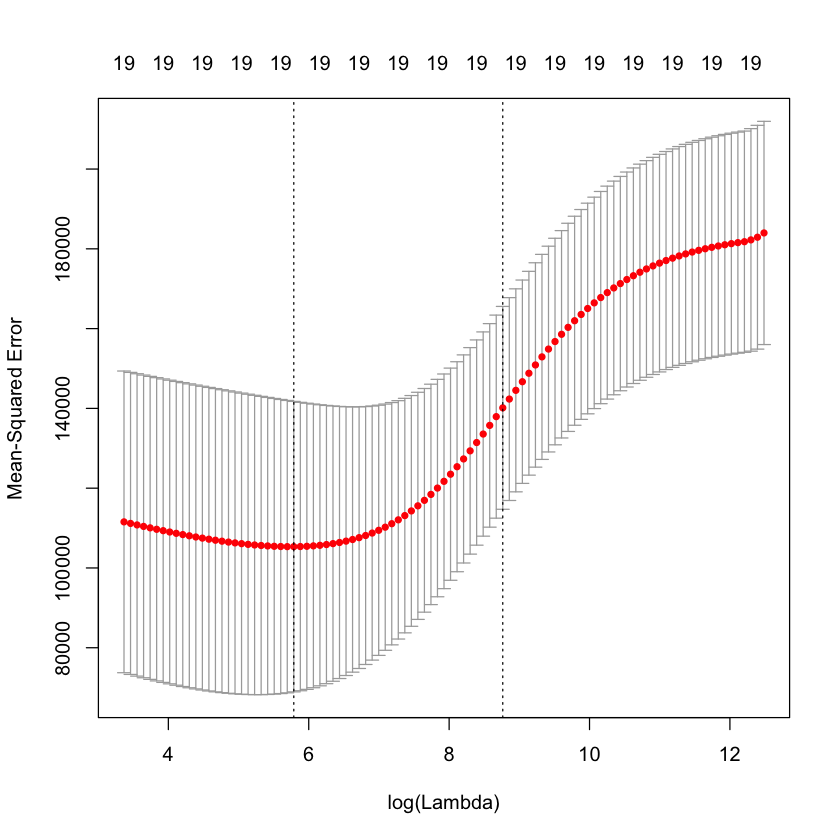

In [99]:
set.seed(1)
cv.out <- cv.glmnet(x[train,], y[train], alpha = 0)
plot(cv.out)

In [100]:
best.lam <- cv.out$lambda.min
best.lam

[1] 326.0828

Therefore, we see that the valuue of $\lambda$ that results in the smallest cross-validation error is 326. What is the test MSE associated with this value of $\lambda$?

In [101]:
ridge.pred <- predict(ridge.mod, s = best.lam, newx = x[test,])
mean((y.test - ridge.pred)^2)

[1] 139856.6

This represents further improvement over the test MSE that we got using $\lambda = 4$. Finally, we refit our ridge regression model on the full data set, using the value of $\lambda$ chosen by cross-validation, and examine the coefficient estimates.

In [102]:
out <- glmnet(x,y,alpha = 0)

In [104]:
predict(out, type = 'coefficients', s = best.lam)

20 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)  15.44383135
AtBat         0.07715547
Hits          0.85911581
HmRun         0.60103107
Runs          1.06369007
RBI           0.87936105
Walks         1.62444616
Years         1.35254780
CAtBat        0.01134999
CHits         0.05746654
CHmRun        0.40680157
CRuns         0.11456224
CRBI          0.12116504
CWalks        0.05299202
LeagueN      22.09143189
DivisionW   -79.04032637
PutOuts       0.16619903
Assists       0.02941950
Errors       -1.36092945
NewLeagueN    9.12487767

## The Lasso  

We saw that the ridge regression with a wise choice of $\lambda$ can outtperform least squares as well as tthe null model on the Hitters data set. We now ask whether the lasso can yield either a more accurate or a more interpretable model than ridge regression. In order to fit a lasso model, we once again use the `glmnet()` function; however, this time we use the argument `alpha=1`. Other than that change, we proceed just as we did in fitting a ridge model.

Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

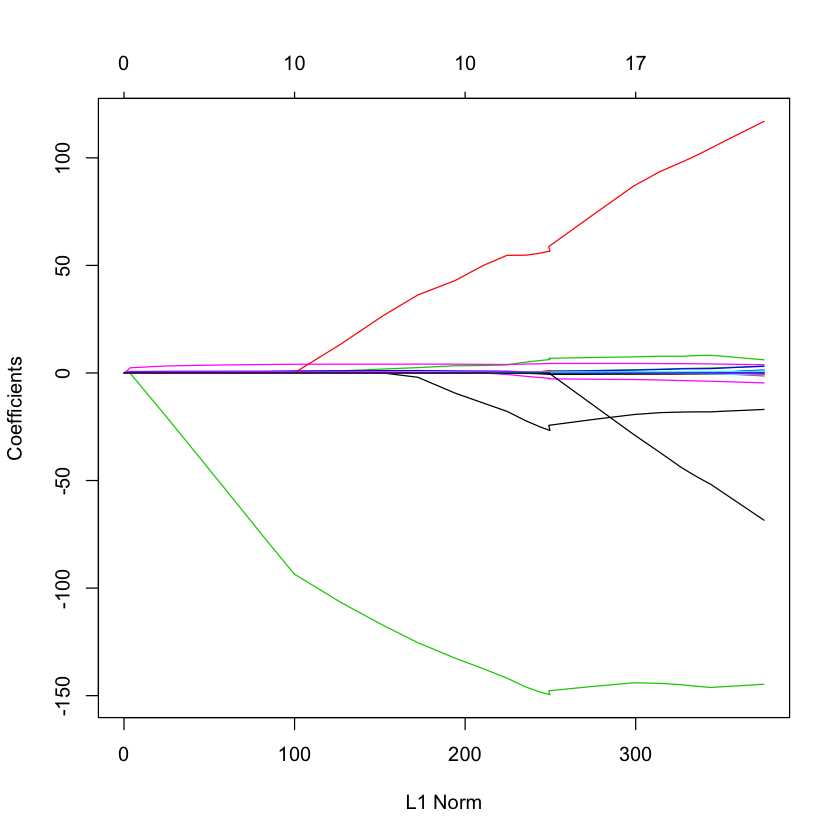

In [107]:
lasso.mod <- glmnet(x[train,], y[train], alpha = 1, lambda = grid)
plot(lasso.mod)

We can see from the coefficient plot tthat depending on the choice of tuning parameter, some of the coefficients will be exactly equal to zero. We now perform cross-validation and compute the associated test errorr.

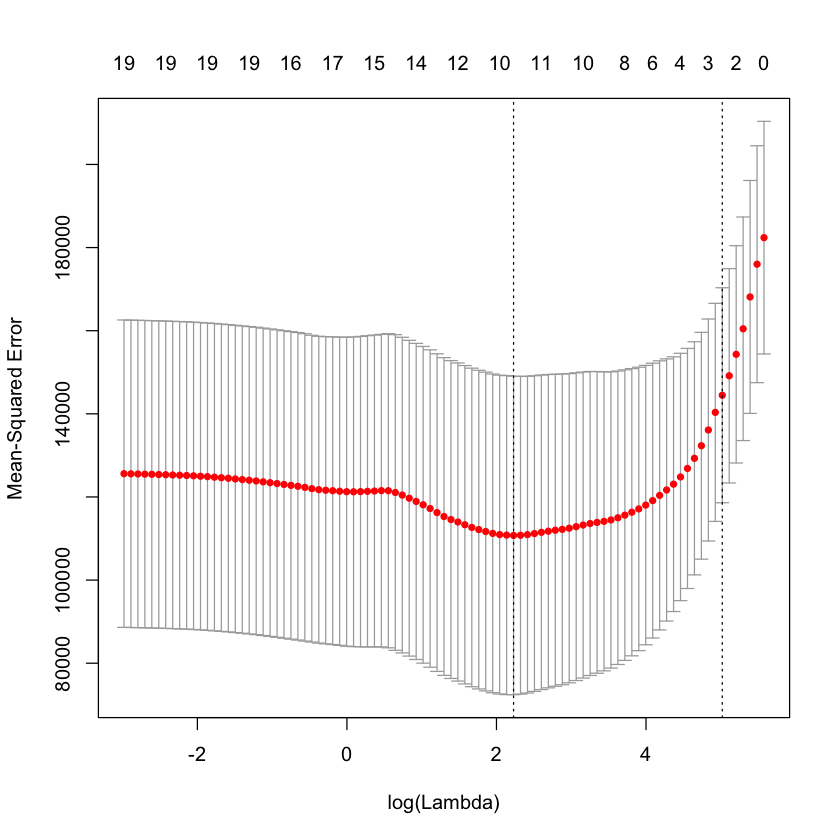

In [108]:
set.seed(1)
cv.out <- cv.glmnet(x[train,], y[train], alpha = 1)
plot(cv.out)

In [109]:
best.lam <- cv.out$lambda.min
lasso.pred <- predict(lasso.mod, s = best.lam, newx = x[test,])
mean((y.test - lasso.pred)^2)

[1] 143673.6

This is not quite as good as the results we got using ridge regression, but the lasso does have an advantage over ridge regression in that the resulting coefficient vector is sparse. Here we see that several of the 19 coefficients are exactly zero. So the lasso model with $\lambda$ chosen by cross-validation only contains 11 variables.

In [111]:
out <- glmnet(x, y, alpha = 1, lambda = grid)
lasso.coef <- predict(out, type = 'coefficients', s = best.lam)
lasso.coef

20 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)    1.27479059
AtBat         -0.05497143
Hits           2.18034583
HmRun          .         
Runs           .         
RBI            .         
Walks          2.29192406
Years         -0.33806109
CAtBat         .         
CHits          .         
CHmRun         0.02825013
CRuns          0.21628385
CRBI           0.41712537
CWalks         .         
LeagueN       20.28615023
DivisionW   -116.16755870
PutOuts        0.23752385
Assists        .         
Errors        -0.85629148
NewLeagueN     .         